#Работа 3: Статистика на Python

## Задание №1

### 1. Загрузить данные из файла “insurance.csv”.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chisquare, shapiro, bartlett, ttest_ind
import statsmodels.api as sm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Балакин Даниил ИНБО-02-21")

Балакин Даниил ИНБО-02-21


In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTelPFWLAgz1uqs1wdS1S16o5sIkTXE-KxAtfq4KLtG5_U2hU_e1SI7DADILSiSGFpkhqN05jCnbVr9/pub?output=csv'
df = pd.read_csv(url)
print("Балакин Даниил ИНБО-02-21")

Балакин Даниил ИНБО-02-21


## Задание №2

### С помощью метода describe() посмотреть статистику по данным. Сделать выводы

In [ ]:
print(df.describe())
print("Балакин Даниил ИНБО-02-21")

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
Балакин Даниил ИНБО-02-21


## Задание №3

### Построить гистограммы для числовых показателей. Сделать выводы.

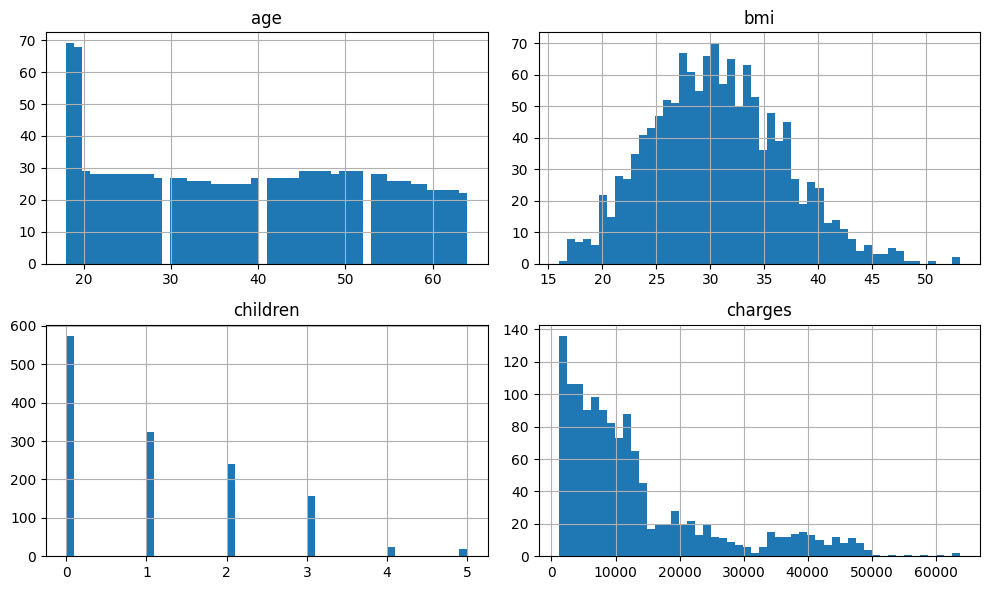

Балакин Даниил ИНБО-02-21


In [ ]:
df.hist(bins=50, figsize=(10, 6))
plt.tight_layout()
plt.show()
print("Балакин Даниил ИНБО-02-21")

Выводы:
age: Распределение является мультимодальным, с особенным пиком до 20 и пиком в категориях 20, 30, 40, 50 и
60 лет. Это означает, что данные имеют несколько локальных максимумов, и количество наблюдений
относительно одинаково для возрастных групп с шагом в 10 лет.
bmi: Распределение приблизительно нормальное с пиком в районе 30. Это говорит о том, что у
большинства людей индекс массы тела колеблется около среднего значения, что типично для многих
популяций.
children: Распределение сильно скошено вправо, и большинство людей не имеют детей (значение 0). С
увеличением количества детей частота наблюдений резко уменьшается.
charges: Распределение скошено вправо, с большинством значений в диапазоне до 10,000. Есть также
длинный хвост, который указывает на наличие значительных затрат на страхование у небольшой части
выборки.
Предполагаю: Возраст — мультимодальное распределение. Индекс массы тела — приближенное нормальное
распределение. Количество детей — скошенное вправо распределение. Стоимость страхования — скошенное
вправо распределение с длинным хвостом.

## Задание №4

### Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии). Добавить легенду на графики. Сделать выводы.


BMI: mean=30.66339686098655, std=6.098186911679017
Charges: mean=13270.422265141257, std=12110.011236693994


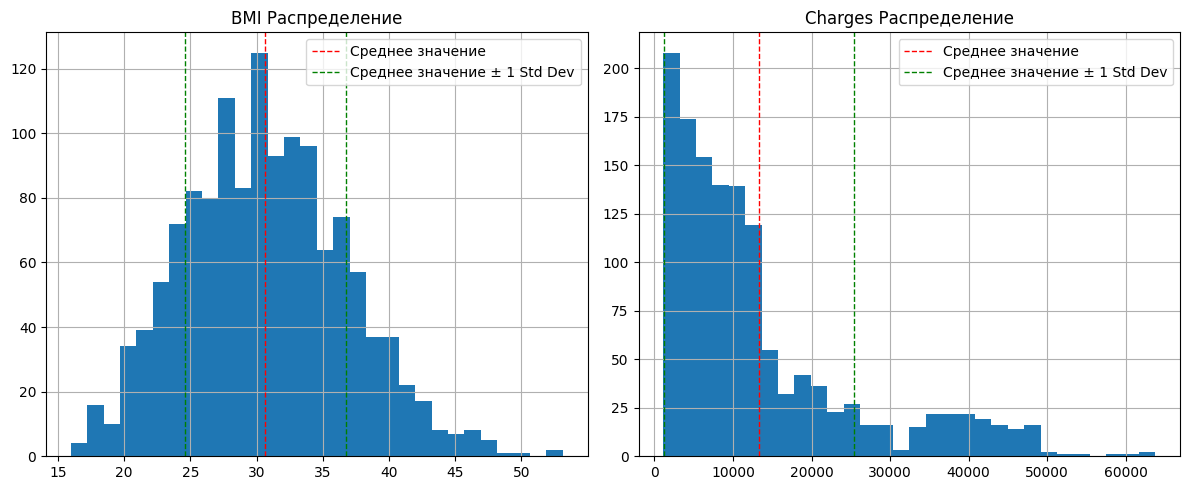

Балакин Даниил ИНБО-02-21


In [ ]:
bmi_mean = df['bmi'].mean()
bmi_std = df['bmi'].std()
charges_mean = df['charges'].mean()
charges_std = df['charges'].std()
print(f"BMI: mean={bmi_mean}, std={bmi_std}")
print(f"Charges: mean={charges_mean}, std={charges_std}")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['bmi'].hist(bins=30)
plt.axvline(bmi_mean, color='r', linestyle='dashed', linewidth=1)
plt.axvline(bmi_mean + bmi_std, color='g', linestyle='dashed', linewidth=1)
plt.axvline(bmi_mean - bmi_std, color='g', linestyle='dashed', linewidth=1)
plt.title('BMI Распределение')
plt.legend(['Среднее значение', 'Среднее значение ± 1 Std Dev'])
plt.subplot(1, 2, 2)
df['charges'].hist(bins=30)
plt.axvline(charges_mean, color='r', linestyle='dashed', linewidth=1)
plt.axvline(charges_mean + charges_std, color='g', linestyle='dashed', linewidth=1)
plt.axvline(charges_mean - charges_std, color='g', linestyle='dashed', linewidth=1)
plt.title('Charges Распределение')
plt.legend(['Среднее значение', 'Среднее значение ± 1 Std Dev'])
plt.tight_layout()
plt.show()
print("Балакин Даниил ИНБО-02-21")

## Задание №5

### Построить box-plot для числовых показателей. Названия графиков должны соответствовать названиям признаков. Сделать выводы.


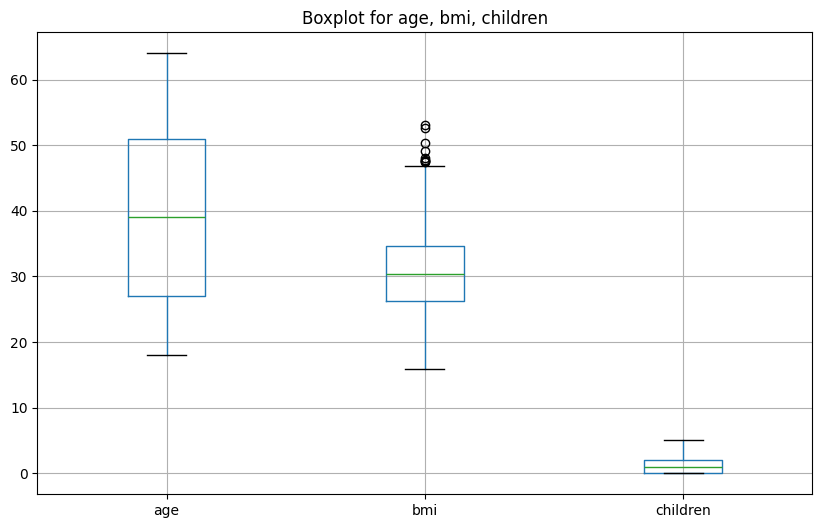

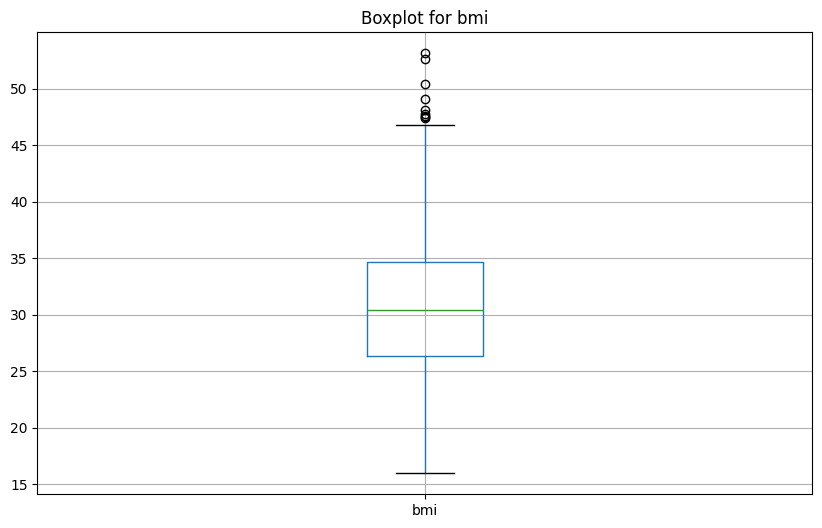

Балакин Даниил ИНБО-02-21


In [ ]:
# Построим boxplot для 'age', 'bmi', 'children'
plt.figure(figsize=(10, 6))
df.boxplot(column=['age', 'bmi', 'children'])
plt.title('Boxplot for age, bmi, children')
plt.show()
# Построение отдельного boxplot для 'charges'
plt.figure(figsize=(10, 6))
df.boxplot(column=['bmi'])
plt.title('Boxplot for bmi')
plt.show()
print("Балакин Даниил ИНБО-02-21")

Вывод: ящик в графике показывает центральную половину распределения данных (от нижнего квартиля до
верхнего), а линия внутри него показывает медиану. Кружочки есть только у bmi, (из рассмотренных
показателей) - это необычайно большие или маленькие значения. Отклонение от нормы типо, они называются
выбросами.


## Задание №6

Используя признак charges или bmi, проверить, выполняется ли центральная предельная теорема.
Использовать различные длины выборок n. Количество выборок = 300. Вывести результат в виде гистограмм.
Найти стандартное отклонение и среднее для полученных распределений. Сделать выводы.

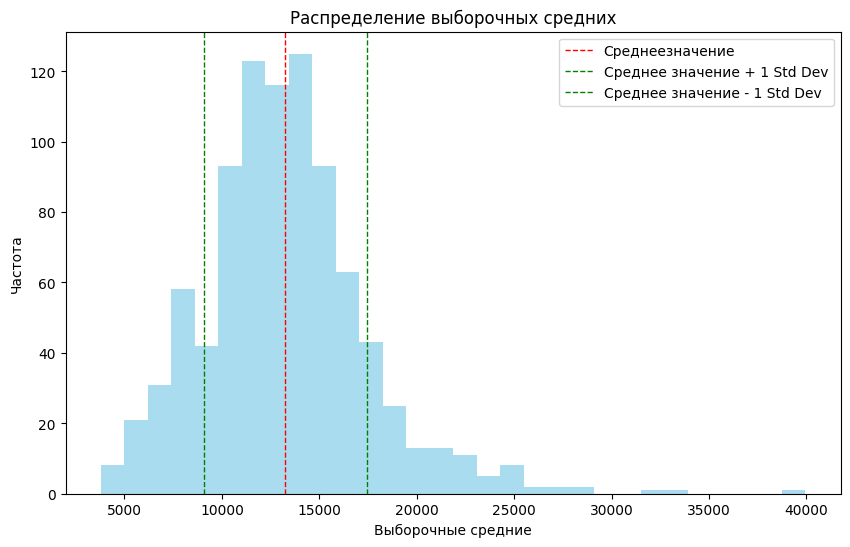

Среднее отклонение: 13250.100901834481, Стандартное отклонение: 4179.231365005827
Балакин Даниил ИНБО-02-21


In [ ]:
# Предположим, что столбец с данными называется 'charges'
sample_means = []
n_values = [5, 10, 30] # Примеры длины выборок
for n in n_values:
  for _ in range(300):
    sample = df['charges'].sample(n=n, replace=True)
    sample_means.append(sample.mean())
# Гистограмма
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, alpha=0.7, color='skyblue')
plt.title('Распределение выборочных средних')
# Среднее и стандартное отклонение
sample_mean_value = np.mean(sample_means)
sample_mean_std = np.std(sample_means)
# Вертикальные линии для среднего и отклонений
plt.axvline(sample_mean_value, color='r', linestyle='dashed', linewidth=1, label='Среднеезначение')
plt.axvline(sample_mean_value + sample_mean_std, color='g', linestyle='dashed', linewidth=1, label='Среднее значение + 1 Std Dev')
plt.axvline(sample_mean_value - sample_mean_std, color='g', linestyle='dashed', linewidth=1, label='Среднее значение - 1 Std Dev')
plt.legend()
plt.xlabel('Выборочные средние')
plt.ylabel('Частота')
plt.show()
# Вывод среднего и стандартного отклонения
print(f"Среднее отклонение: {sample_mean_value}, Стандартное отклонение: {sample_mean_std}")
print("Балакин Даниил ИНБО-02-21")

Вывод: Гистограмма подтверждает выполнение центральной предельной теоремы. Средние значения выборок
приближаются к нормальному распределению, несмотря на исходное распределение признака "bmi". На это
указывает колоколообразная форма и то что большинство значений в промежутке средних значений

## Задание №7

Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса
массы тела.

In [ ]:
def confidence_interval(data, confidence=0.95):
  mean = np.mean(data)
  n = len(data)
  std_err = stats.sem(data)
  h = std_err * stats.t.ppf((1 + confidence) / 2., n-1)
  return mean - h, mean + h
# Доверительные интервалы для расходов
ci_95_charges = confidence_interval(df['charges'], 0.95)
ci_99_charges = confidence_interval(df['charges'], 0.99)
# Доверительные интервалы для иьш
ci_95_bmi = confidence_interval(df['bmi'], 0.95)
ci_99_bmi = confidence_interval(df['bmi'], 0.99)
print(f"95% Доверительный интервал для расходов: {ci_95_charges}")
print(f"99% ДИ для расходов: {ci_99_charges}")
print(f"95% ДИ для BMI: {ci_95_bmi}")
print("Балакин Даниил ИНБО-02-21")

95% Доверительный интервал для расходов: (12620.954034192644, 13919.890496089869)
99% ДИ для расходов: (12416.429943203952, 14124.414587078561)
95% ДИ для BMI: (30.336346903054107, 30.99044681891899)
Балакин Даниил ИНБО-02-21


## Задание №8

Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы.
Сформулировать нулевую и альтернативную гипотезы. Для каждого признака использовать KS-тест и q- plot.
Сделать выводы на основе полученных p-значений.

KS test for BMI: statistic=0.026099881197044816, p-value=0.31627982428380297
KS test for Charges: statistic=0.18846450965981876, p-value=4.381949677777384e-42


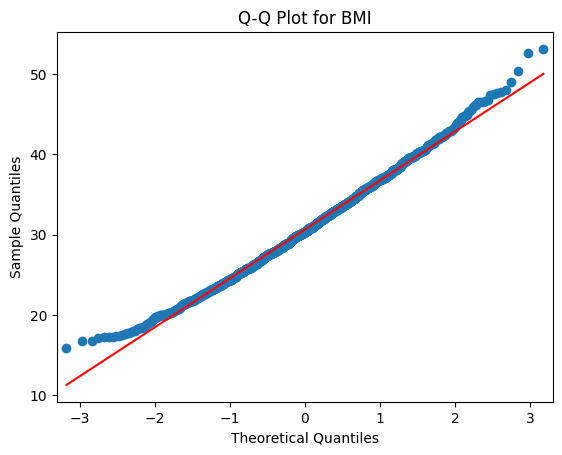

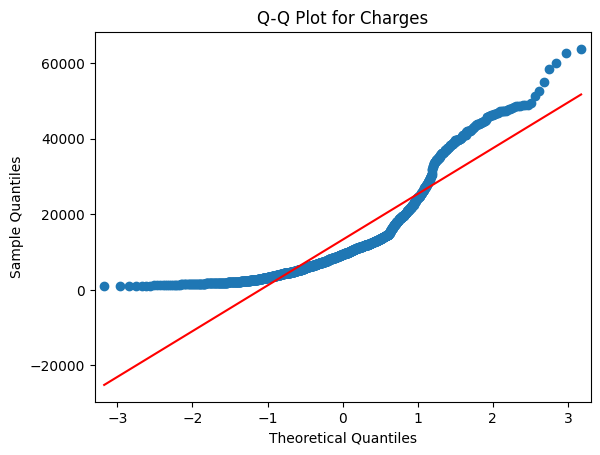

Балакин Даниил ИНБО-02-21


In [ ]:
from scipy.stats import kstest
import statsmodels.api as sm
# KS-тест
ks_bmi = kstest(df['bmi'], 'norm', args=(df['bmi'].mean(), df['bmi'].std()))
ks_charges = kstest(df['charges'], 'norm', args=(df['charges'].mean(), df['charges'].std()))
print(f"KS test for BMI: statistic={ks_bmi.statistic}, p-value={ks_bmi.pvalue}")
print(f"KS test for Charges: statistic={ks_charges.statistic}, p-value={ks_charges.pvalue}")
# Q-Q plot
sm.qqplot(df['bmi'], line='s')
plt.title('Q-Q Plot for BMI')
plt.show()
sm.qqplot(df['charges'], line='s')
plt.title('Q-Q Plot for Charges')
plt.show()
print("Балакин Даниил ИНБО-02-21")

Нулевая гипотеза:
1) Распределение выборки по показателю BMI соответствует нормальному распределению.
2) Распределение выборки по показателю расходов соответствует нормальному распределению.
Альтернативная гипотеза:
1) Распределение выборки по показателю BMI не соответствует нормальному распределению.
1) Распределение выборки по показателю расходов не соответствует нормальному распределению.
Вывод:
Для признака BMI можно предположить нормальное распределение.
Для признака расходов нормальное распределение не выполняется

## Задание №9

Загрузить данные из файла “ECDCCases.csv”

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS5eEZeI7MFEq0oBvgmZYM2yK8Dh5aITRcaQKIGODKpKmZdHWZ-4ZU12Yw2RnigP8qwCtqx0jMOVl-7/pub?output=csv'
df_ecdc = pd.read_csv(url)
print("Балакин Даниил ИНБО-02-21")

Балакин Даниил ИНБО-02-21


## Задание №10


Проверить в данных наличие пропущенных значений. Вывести количество пропущенных значений в процентах.
Удалить два признака, в которых больше всех пропущенных значений. Для оставшихся признаков обработать
пропуски: для категориального признака использовать заполнение значением по умолчанию (например, « »),
для числового признака использовать заполнение медианным значением. Показать, что пропусков больше в
для числового признака использовать заполнение медианным значением. Показать, что пропусков больше в
данных нет.

In [ ]:
# Проверка наличия пропущенных значений в процентах
missing_percent = df_ecdc.isnull().mean() * 100
print(missing_percent,'\n\n-----\n')
# Удаляем два признака с наибольшим количеством пропущенных значений
columns_to_drop = missing_percent.nlargest(2).index
df_ecdc_clean = df_ecdc.drop(columns=columns_to_drop)
# Обрабатываем оставшиеся пропуски
# Для категориальных признаков используем значение по умолчанию "other"
categorical_cols = df_ecdc_clean.select_dtypes(include=['object']).columns
df_ecdc_clean[categorical_cols] = df_ecdc_clean[categorical_cols].fillna('other')
# Для числовых признаков заполняем медианными значениями
numerical_cols = df_ecdc_clean.select_dtypes(include=['float64', 'int64']).columns
df_ecdc_clean[numerical_cols] = df_ecdc_clean[numerical_cols].fillna(df_ecdc_clean[numerical_cols].median())
# всё по нулям?
print(df_ecdc_clean.isnull().sum())
print("Балакин Даниил ИНБО-02-21")

dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
geoId                                                         0.444236
countryterritoryCode                                          0.198695
popData2019                                                   0.198695
continentExp                                                  0.000000
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.650750
dtype: float64 

-----

dateRep                    0
day                        0
month                      0
year                       0
cases   

## Задание №11

Посмотреть статистику по данным, используя describe(). Сделать выводы о том, какие признаки содержат
выбросы. Посмотреть, для каких стран количество смертей в день превысило 3000 и сколько таких дней было.

In [ ]:
print(df_ecdc_clean.describe(),'\n\n-----\n')
# >3000 deaht
high_death_days = df_ecdc_clean[df_ecdc_clean['deaths'] > 3000]
print(high_death_days['countriesAndTerritories'].value_counts())
print("Балакин Даниил ИНБО-02-21")

                day         month          year          cases        deaths  \
count  61904.000000  61904.000000  61904.000000   61904.000000  61904.000000   
mean      15.629232      7.067104   2019.998918    1155.079026     26.053987   
std        8.841624      2.954816      0.032881    6779.010824    131.222948   
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000   
25%        8.000000      5.000000   2020.000000       0.000000      0.000000   
50%       15.000000      7.000000   2020.000000      15.000000      0.000000   
75%       23.000000     10.000000   2020.000000     273.000000      4.000000   
max       31.000000     12.000000   2020.000000  234633.000000   4928.000000   

        popData2019  
count  6.190400e+04  
mean   4.091909e+07  
std    1.529798e+08  
min    8.150000e+02  
25%    1.324820e+06  
50%    7.169456e+06  
75%    2.851583e+07  
max    1.433784e+09   

-----

countriesAndTerritories
United_States_of_America    6
Peru              

## Задание №12

Найти дублирование данных. Удалить дубликаты

In [ ]:
duplicate_count = df_ecdc_clean.duplicated().sum()
print(f"Количество дубликатов: {duplicate_count}")
# Удаляем дубликаты
df_ecdc_clean = df_ecdc_clean.drop_duplicates()
print("Балакин Даниил ИНБО-02-21")

## Задание №13

Загрузить данные из файла “bmi.csv”. Взять оттуда две выборки.
Одна выборка – это индекс массы тела людей региона northwest,
вторая выборка – это индекс массы тела людей с региона southwest.
Сравнить средние значения этих выборок, используя t-критерий Стьюдента.
Предварительно проверить выборки на нормальность (критерий Шопиро-Уилка) и на гомогенность дисперсии
(критерий Бартлетта).

In [ ]:
df_bmi = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fiels/bmi.csv")
# Выборки для регионов northwest и southwest
bmi_northwest = df_bmi[df_bmi['region'] == 'northwest']['bmi']
bmi_southwest = df_bmi[df_bmi['region'] == 'southwest']['bmi']
# Проверка выборки нормальности
stat_northwest, p_northwest = shapiro(bmi_northwest)
stat_southwest, p_southwest = shapiro(bmi_southwest)
print(f"Тест Шапиро-Уилка для northwest: стат={stat_northwest}, p-значение={p_northwest}")
print(f"Тест Шапиро-Уилка для southwest: стат={stat_southwest}, p-значение={p_southwest}")
# Проверка гомогенности
stat_bartlett, p_bartlett = bartlett(bmi_northwest, bmi_southwest)
print(f"Тест Бартлетта: стат={stat_bartlett}, p-значение={p_bartlett}")
# Сравнение средних значений
t_stat, p_value = ttest_ind(bmi_northwest, bmi_southwest, equal_var=True)
print(f"T-критерий Стьюдента: стат={t_stat}, p-значение={p_value}")
print("Балакин Даниил ИНБО-02-21")

## Задание №14

Кубик бросили 600 раз, получили следующие результаты:

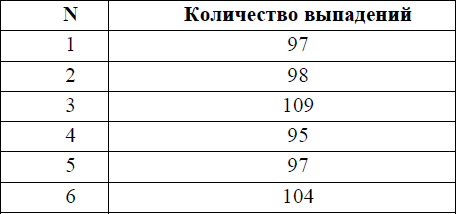

С помощью критерия Хи-квадрат проверить, является ли полученное распределение равномерным.
Использовать функцию scipy.stats.chisquare().

In [ ]:
o = [97, 98, 109, 95, 97, 104]
e = [100] * 6
chikva_stat, p_value = chisquare(o, e)
print(f"Статистика критерия хи-квадрат: {chikva_stat}, p-значение: {p_value}")
print("Балакин Даниил ИНБО-02-21")

## Задание №15

С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми. Создать датафрейм,
используя следующий код:

In [ ]:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1], 'Гражданский брак': [80,22,20,35,6,4], 'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']
print("Балакин Даниил ИНБО-02-21")

Использовать функцию scipy.stats.chi2_contingency().

In [ ]:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1], 'Гражданский брак': [80,22,20,35,6,4], 'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не работает', 'На домохозяйстве','На пенсии','Учёба']
chikva_stat, p, dof, ex = stats.chi2_contingency(data)
print(f"Статистика критерия хи-квадрат: {chikva_stat}, p-значение: {p}")
print("Балакин Даниил ИНБО-02-21")